In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#1. Image Fundamentals

In [3]:
def imshow(*args, figsize=10, to_rgb=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1])
        plt.axis('off')
    plt.show()

In [9]:
def hist(image):
	m, n = image.shape
	hist = [0.0] * 256
	for i in range(m):
		for j in range(n):
			hist[image[i, j]]+=1
	return np.array(hist)/(m*n)

In [10]:
def cdf(hist):
	return [sum(hist[:i+1]) for i in range(len(hist))]

In [11]:
def histeq(image):
	h = hist(image)
	cumsum = np.array(cdf(h))
	sk = np.uint8(255 * cumsum)
	s1, s2 = image.shape
	new_img = np.zeros_like(image)
	# applying transfered values for each pixels
	for i in range(0, s1):
		for j in range(0, s2):
			new_img[i, j] = sk[image[i, j]]
	Hist = hist(new_img)
	#return transformed image, original and new histogram, 
	# and transform function
	return new_img , Hist

##1.1. Quantization & Interpolation

###1.1.1. display the quantized image in (4,8,16,32,64,128) Levels and its histograms

In [63]:
elaine = cv2.imread('/content/sample_data/Elaine.bmp', cv2.IMREAD_GRAYSCALE)

In [7]:
def quantize(image, n_bits):
    coeff = 2**8 // 2**n_bits
    coeff2= 2**8 // (2**n_bits - 1)
    return (image // coeff) * coeff2

In [8]:
flat=elaine.flatten()

####Without HistEq

#####original image and hist

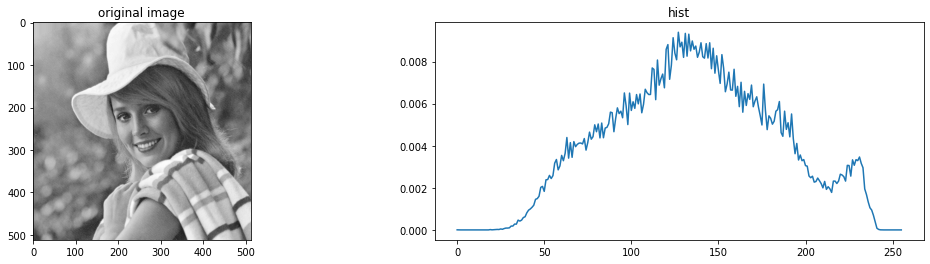

In [28]:
plt.subplot(121)
plt.imshow(elaine)
plt.title('original image')

orghist = hist(np.uint8(elaine))

plt.subplot(122)
plt.plot(orghist)
plt.title('hist')
plt.set_cmap('gray')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

##### 128 levels

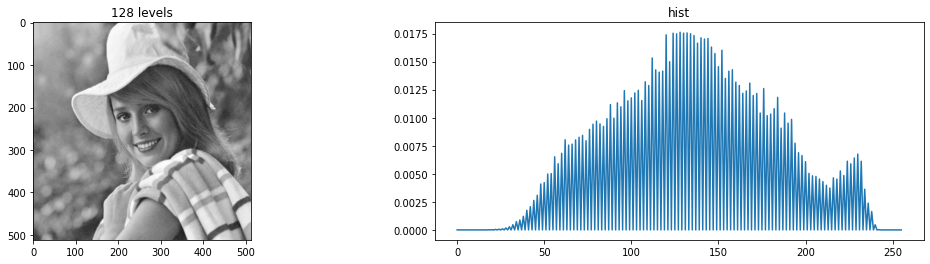

In [29]:
img128levels = quantize(elaine,7)

plt.subplot(121)
plt.imshow(img128levels)
plt.title('128 levels')


hist128 = hist(np.uint8(img128levels))

plt.subplot(122)
plt.plot(hist128)
plt.title('hist')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

#####64 levels

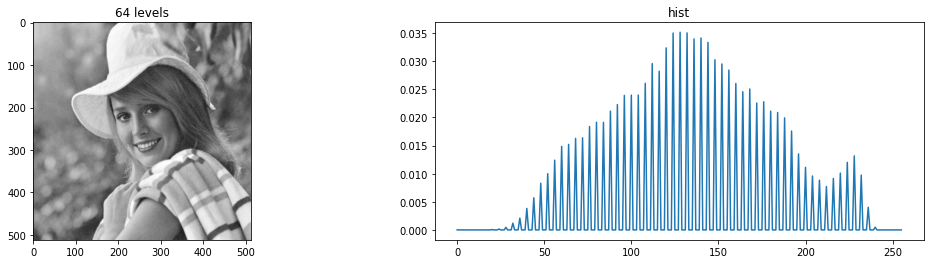

In [196]:
img64levels = quantize(elaine,6)

plt.subplot(121)
plt.imshow(img64levels)
plt.title('64 levels')


hist64 = hist(np.uint8(img64levels))

plt.subplot(122)
plt.plot(hist64)
plt.title('hist')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

#####32 levels

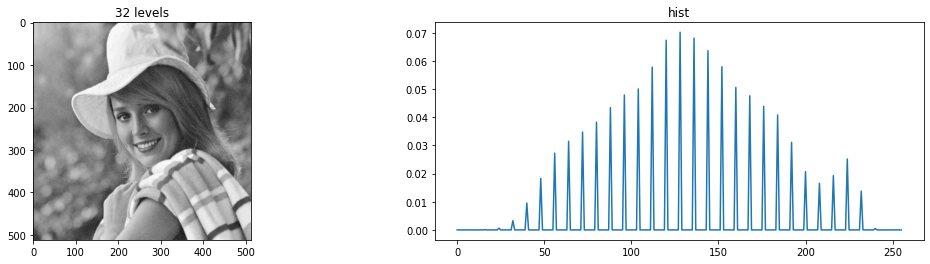

In [198]:
img32levels = quantize(elaine,5)

plt.subplot(121)
plt.imshow(img32levels)
plt.title('32 levels')


hist32 = hist(np.uint8(img32levels))

plt.subplot(122)
plt.plot(hist32)
plt.title('hist')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

#####16 levels

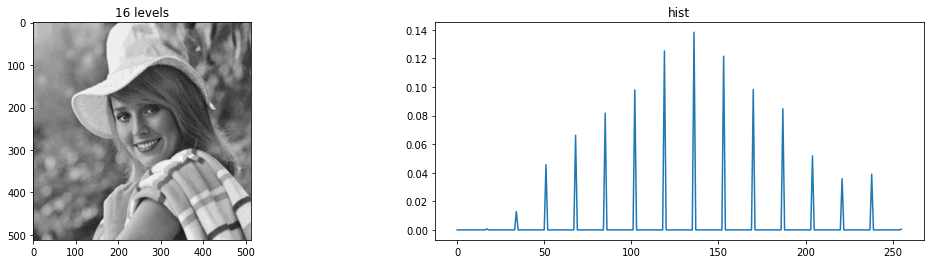

In [199]:
img16levels = quantize(elaine,4)

plt.subplot(121)
plt.imshow(img16levels)
plt.title('16 levels')


hist16 = hist(np.uint8(img16levels))

plt.subplot(122)
plt.plot(hist16)
plt.title('hist')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

#####8 levels

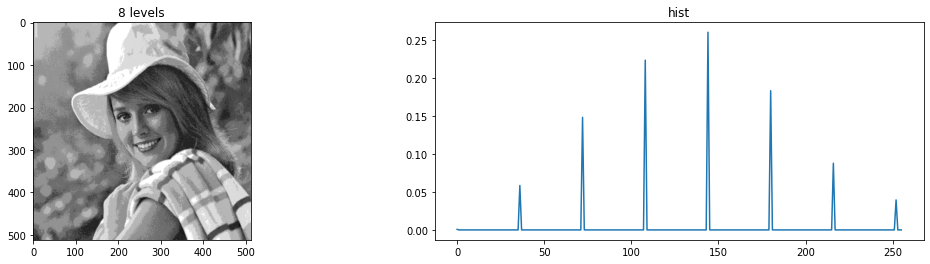

In [200]:
img8levels = quantize(elaine,3)

plt.subplot(121)
plt.imshow(img8levels)
plt.title('8 levels')


hist8 = hist(np.uint8(img8levels))

plt.subplot(122)
plt.plot(hist8)
plt.title('hist')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

#####4 levels

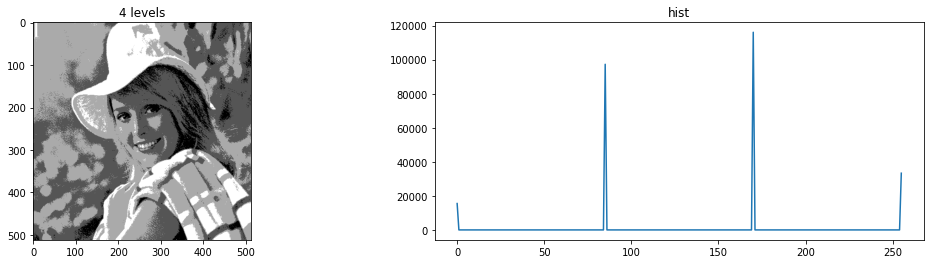

In [208]:
img4levels = quantize(elaine,2)

plt.subplot(121)
plt.imshow(img4levels)
plt.title('4 levels')


hist4 = hist(np.uint8(img4levels))

plt.subplot(122)
plt.plot(hist4)
plt.title('hist')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

#####2 levels

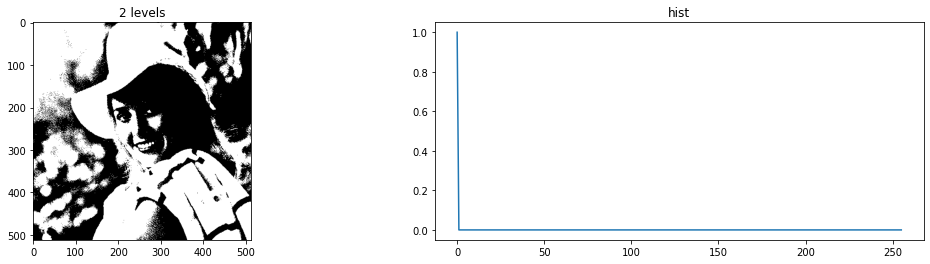

In [227]:
img2levels = quantize(elaine,1)

plt.subplot(121)
plt.imshow(img2levels)
plt.title('2 levels')


hist2 = hist(np.uint8(img2levels))

plt.subplot(122)
plt.plot(hist2)
plt.title('hist')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

####With HistEq

#####original image and hist

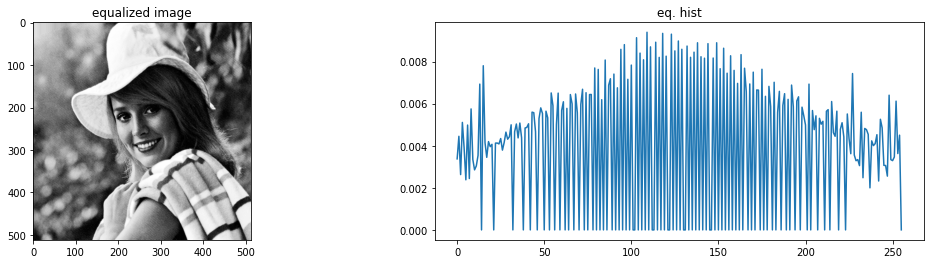

In [30]:
new_img, histeqorg = histeq(np.uint8(elaine))

plt.subplot(121)
plt.imshow(new_img)
plt.title('equalized image')

plt.subplot(122)
plt.plot(histeqorg)
plt.title('eq. hist')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

#####128 levels

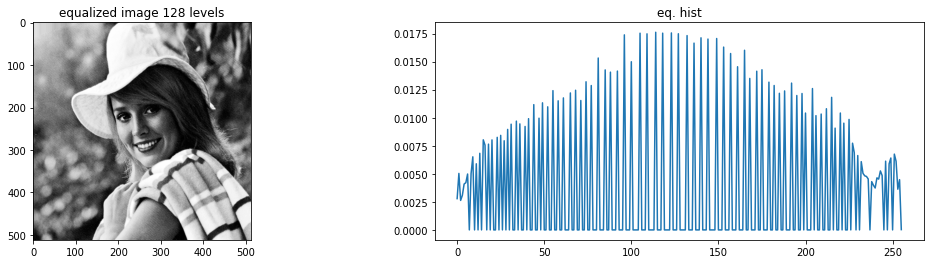

In [43]:
img128levels = quantize(elaine, 7)
new_img128levels, histeq128 = histeq(np.uint8(img128levels))

plt.subplot(121)
plt.imshow(new_img128levels)
plt.title('equalized image 128 levels')

plt.subplot(122)
plt.plot(histeq128)
plt.title('eq. hist')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

#####64 levels

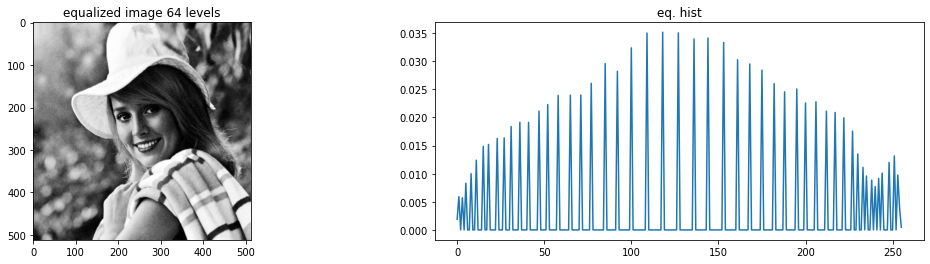

In [44]:
img64levels = quantize(elaine, 6)
new_img64levels, histeq64 = histeq(np.uint8(img64levels))

plt.subplot(121)
plt.imshow(new_img64levels)
plt.title('equalized image 64 levels')

plt.subplot(122)
plt.plot(histeq64)
plt.title('eq. hist')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

#####32 levels

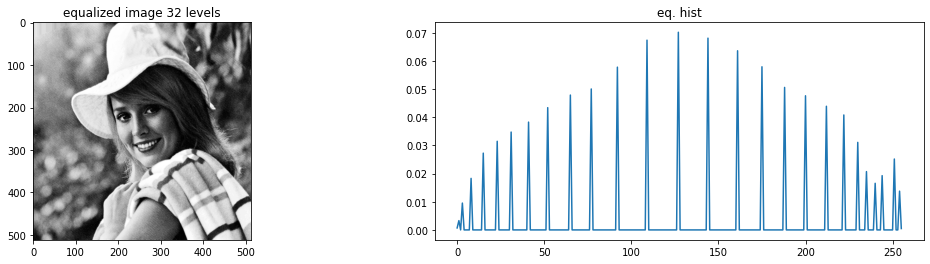

In [45]:
img32levels = quantize(elaine, 5)
new_img32levels, histeq32 = histeq(np.uint8(img32levels))

plt.subplot(121)
plt.imshow(new_img32levels)
plt.title('equalized image 32 levels')

plt.subplot(122)
plt.plot(histeq32)
plt.title('eq. hist')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

#####16 levels

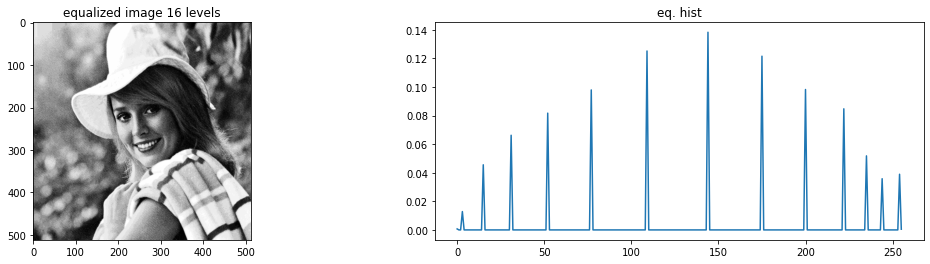

In [46]:
img16levels = quantize(elaine, 4)
new_img16levels, histeq16 = histeq(np.uint8(img16levels))

plt.subplot(121)
plt.imshow(new_img16levels)
plt.title('equalized image 16 levels')

plt.subplot(122)
plt.plot(histeq16)
plt.title('eq. hist')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

#####8 levels

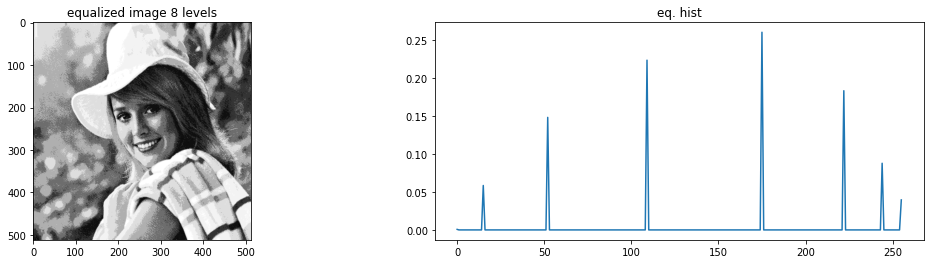

In [47]:
img8levels = quantize(elaine, 3)
new_img8levels, histeq8 = histeq(np.uint8(img8levels))

plt.subplot(121)
plt.imshow(new_img8levels)
plt.title('equalized image 8 levels')

plt.subplot(122)
plt.plot(histeq8)
plt.title('eq. hist')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

#####4levels

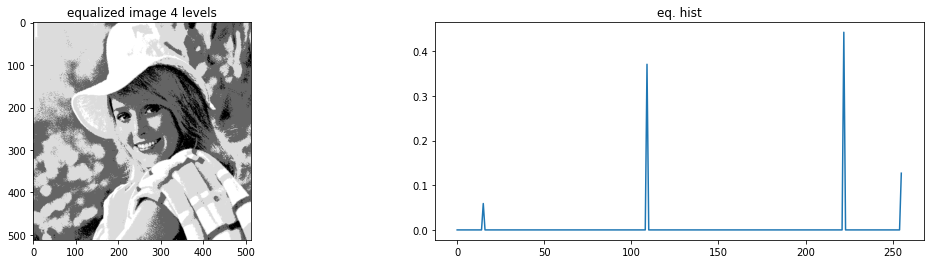

In [48]:
img4levels = quantize(elaine, 2)
new_img4levels, histeq4 = histeq(np.uint8(img4levels))

plt.subplot(121)
plt.imshow(new_img4levels)
plt.title('equalized image 4 levels')

plt.subplot(122)
plt.plot(histeq4)
plt.title('eq. hist')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

####MSE

In [49]:
def MSE(x,y):
  return np.square(np.subtract(x,y)).mean()

In [69]:
df = pd.DataFrame([('Without Histeq', MSE(elaine, img128levels), MSE(elaine, img64levels), MSE(elaine, img32levels),
                    MSE(elaine, img16levels), MSE(elaine, img8levels), MSE(elaine, img4levels)),
                   ('With Histeq', MSE(elaine, new_img128levels), MSE(elaine, new_img64levels), MSE(elaine, new_img32levels),
                    MSE(elaine, new_img16levels), MSE(elaine, new_img8levels), MSE(elaine, new_img4levels))],
                    columns=('Levels', '128', '64', '32', '16', '8', '4' ))

In [70]:
df

Levels         128          64          32          16           8  \
0  Without Histeq    0.509254    3.468834   17.381859   32.774803   76.570976   
1     With Histeq  102.832993  106.985451  106.654507  108.296638  108.791664   

            4  
0  102.684330  
1  109.074158

###1.1.2. downsample

In [82]:
goldhill = cv2.imread('/content/sample_data/Goldhill.bmp', cv2.IMREAD_GRAYSCALE)

In [112]:
goldhill = cv2.imread('/content/sample_data/Goldhill.bmp')

In [88]:
down_sampled = goldhill[0::2,0::2]

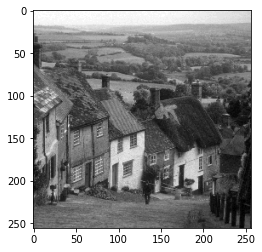

In [87]:
plt.imshow(down_sampled)

In [86]:
down_sampled.shape

(256, 256)

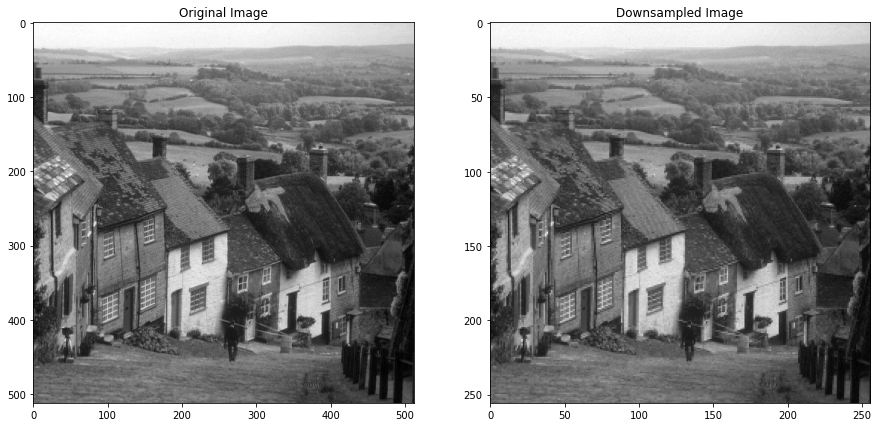

In [93]:
res = cv2.resize(goldhill, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)

plt.figure(figsize=(15,12))

plt.subplot(121)
plt.imshow(goldhill,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(res,cmap = 'gray')
plt.title('Downsampled Image')

plt.show()

In [94]:
res.shape

(256, 256)

In [113]:
def down_sample_avg(im):
    original_width = im.shape[1]
    original_height = im.shape[0]
    width = original_width / 2
    height = original_height / 2

    resized_image = np.zeros(shape=(height, width, 3), dtype=np.uint8)
    scale = 2

    for i in range(height):
        for j in range(width):
            temp = np.array([0, 0, 0])
            for x in range(scale):
                for y in range(scale):
                    temp += im[i*scale + x, j*scale + y]
            resized_image[i, j] = temp/(scale*scale)

    return resized_image

TypeError: ignored

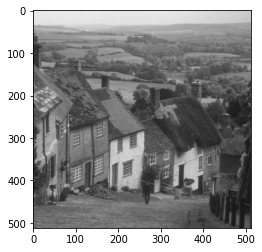

In [114]:
plt.imshow(goldhill)
plt.imshow(down_sample_avg(goldhill))

In [106]:
goldhill

array([[228, 228, 236, ..., 204, 196, 204],
       [228, 228, 228, ..., 196, 204, 196],
       [228, 236, 236, ..., 196, 204, 196],
       ...,
       [100, 108, 108, ...,  68,  44,  28],
       [100, 116, 108, ...,  68,  36,  28],
       [116, 116, 116, ...,  76,  44,  28]], dtype=uint8)

#2. Contrast Adjustment

##2.1. Histogram Equalization

###2.1.1 illustrate the histogram as a stem plot

In [15]:
camera_man = cv2.imread('/content/sample_data/Camera Man.bmp', cv2.IMREAD_GRAYSCALE)

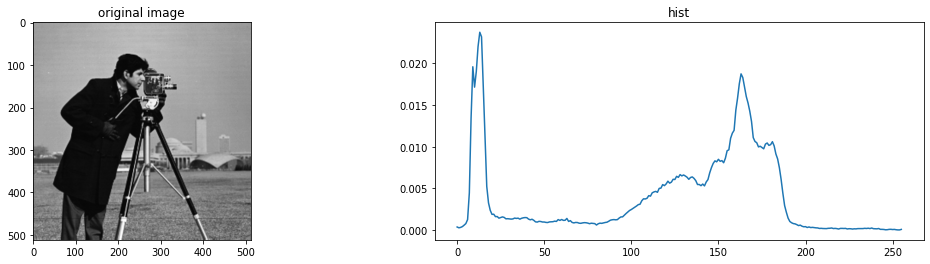

In [16]:
plt.subplot(121)
plt.imshow(camera_man)
plt.title('original image')

orghist = hist(np.uint8(camera_man))

plt.subplot(122)
plt.plot(orghist)
plt.title('hist')
plt.set_cmap('gray')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


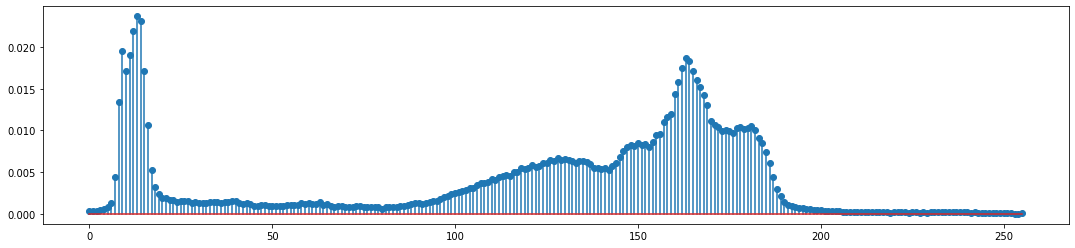

In [9]:
plt.subplot(111)
plt.stem(orghist)
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

####2.1.1.1.

In [10]:
D = camera_man//3

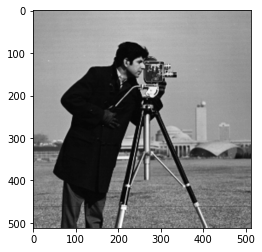

In [11]:
plt.imshow(D)

####2.1.1.2.

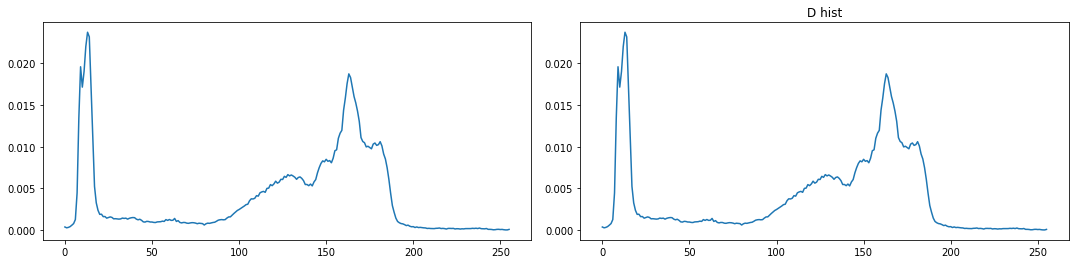

In [15]:
plt.subplot(121)
plt.title('D hist')
plt.plot(orghist)

dhist = hist(np.uint8(D))

plt.subplot(122)
plt.plot(orghist)
plt.title('D hist')
plt.subplots_adjust(right=2.5, wspace=0.1)

plt.show()

###2.1.2. histeq

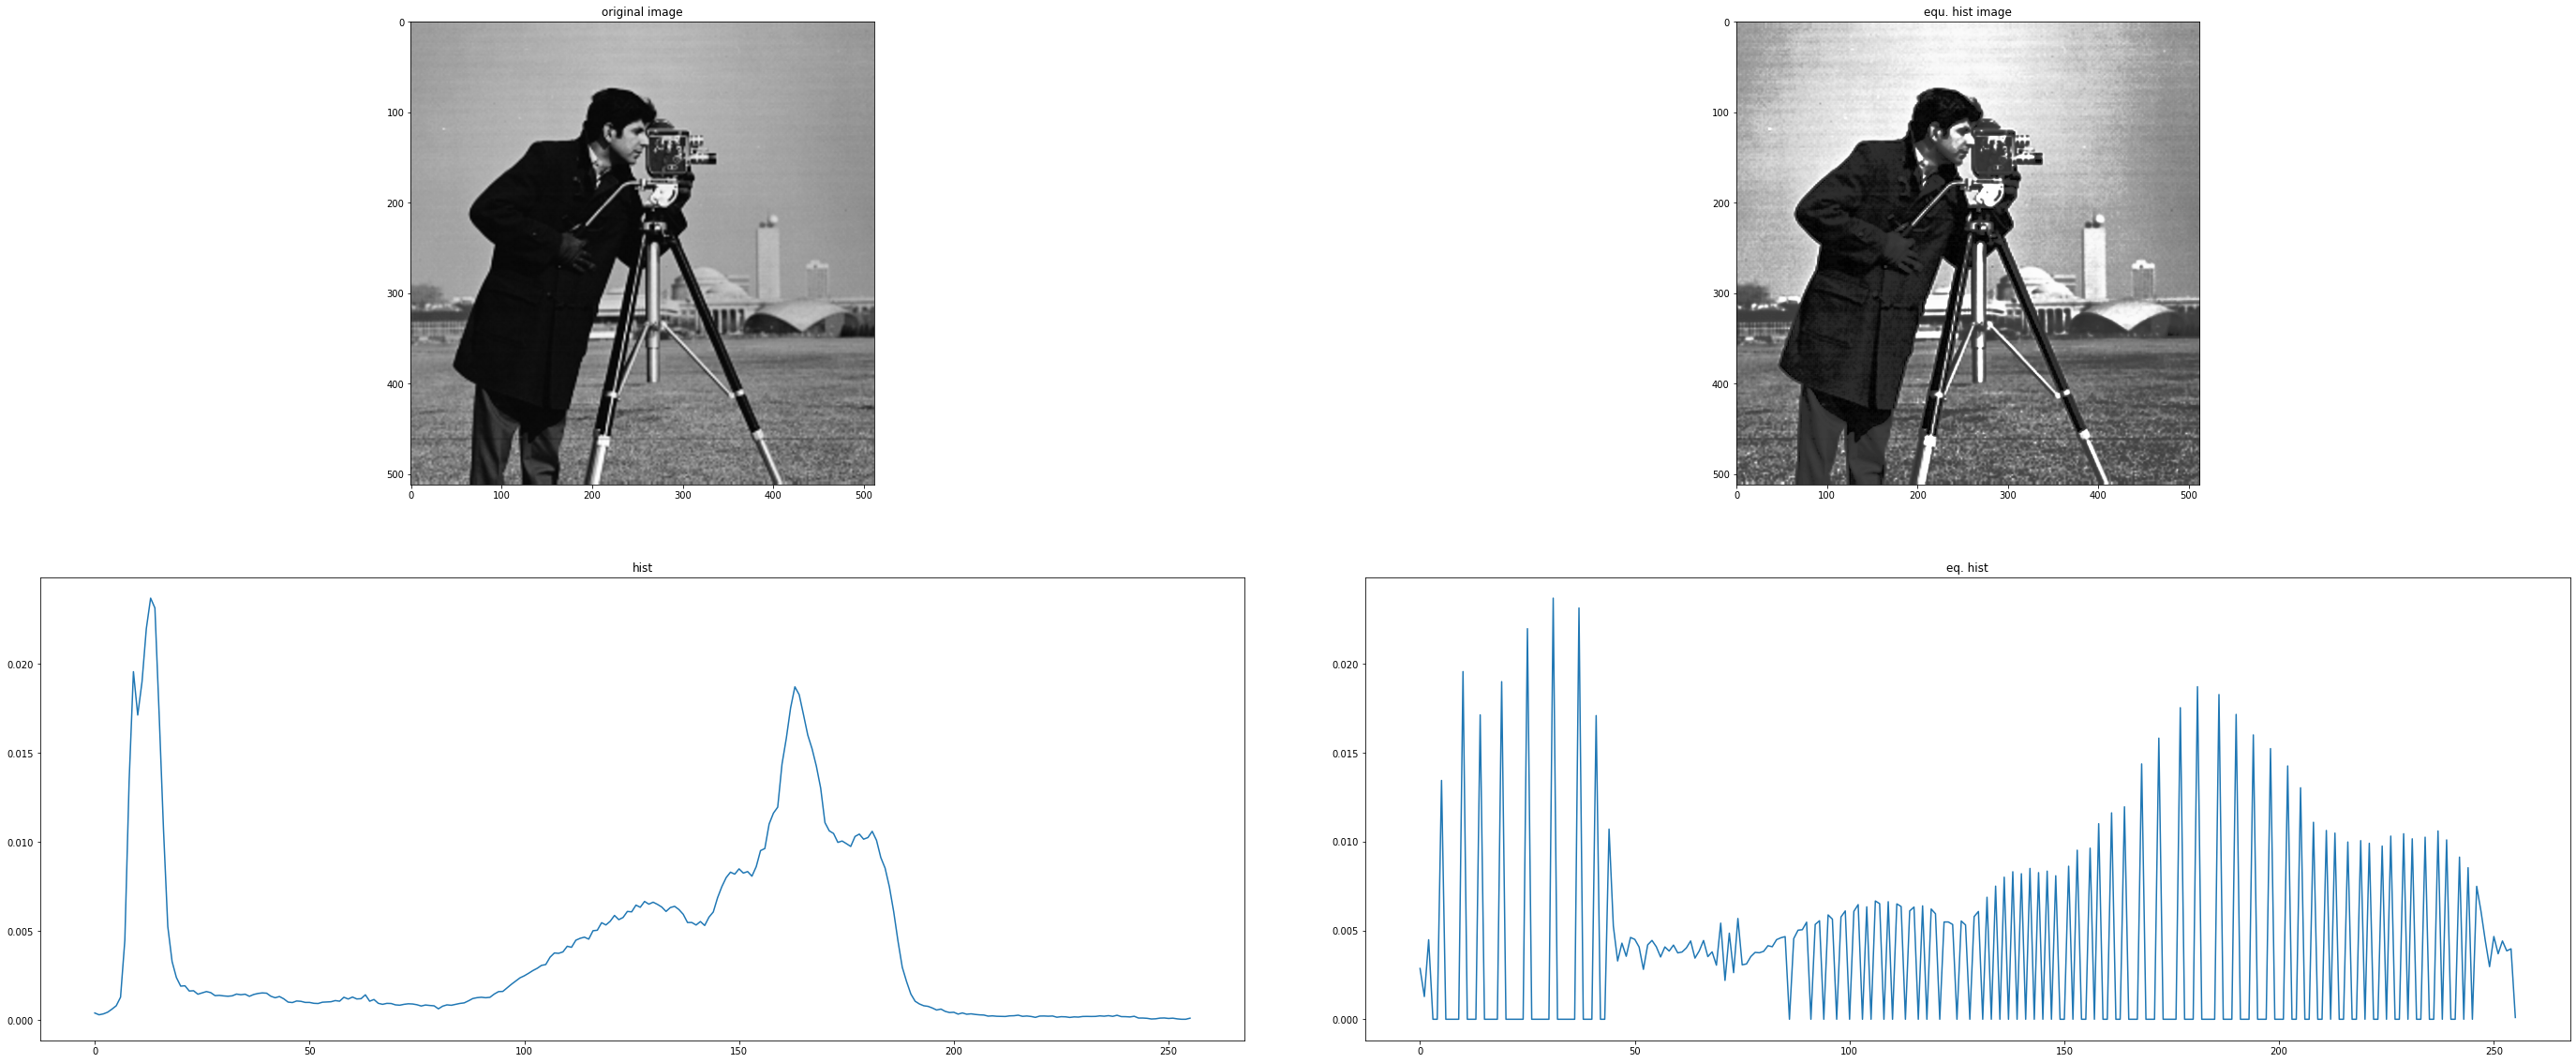

In [48]:
orghist = hist(np.uint8(camera_man))
equimg, ehist = histeq(camera_man)
plt.figure(figsize=(20,20))
plt.subplots_adjust(right=2, wspace=0.1)

plt.subplot(221)
plt.title('original image')
plt.imshow(camera_man)

plt.subplot(222)
plt.title('equ. hist image')
plt.imshow(equimg)


plt.subplot(223)
plt.title('hist')
plt.plot(orghist)

plt.subplot(224)
plt.title('eq. hist')
plt.plot(ehist)

plt.show()

##2.2

In [158]:
he1 = cv2.imread('/content/sample_data/HE1.jpg', cv2.IMREAD_GRAYSCALE)

In [192]:
def addpadding(source,padx,pady):
    imarr = np.array(source)
    padimarr = np.zeros((imarr.shape[0]+2*padx,imarr.shape[1]+2*pady),dtype=np.uint8)
    padimarr[padx:padimarr.shape[0]-padx,pady:padimarr.shape[1]-pady]=imarr
    return padimarr

In [ ]:
A=imread('tire.tif');
figure,imshow(A);
Img=A;
def lhe(Img,M=10,N=20):
  mid_val=(M*N)//2

  inn=0;
  for i in range(0,M):
    for j in range (0,N):
        inn=inn+1
        if(inn==mid_val):
            PadM=i-1;
            PadN=j-1;
            break

  B=addpadding(Img,PadM,PadN);

  for i in range( 0, B.shape[0]-((PadM*2)+1)):
    for j in range(0, B.shape[1]-((PadN*2)+1)):
        cdf=np.zeros(256);
        inc=1;
        for x in range(0,M):
            for y in range (0,N):
  #FIND THE MIDDLE ELEMENT IN THE WINDOW          
                if(inc==mid_val):
                    ele=B[i+x-1,j+y-1]+1;
                pos=B[i+x-1,j+y-1]+1;
                cdf[pos]=cdf[pos]+1;
                inc=inc+1;

                      
        #COMPUTE THE CDF FOR THE VALUES IN THE WINDOW
        for l=2:256
            cdf(l)=cdf(l)+cdf(l-1);
        end
            Img(i,j)=round(cdf(ele)/(M*N)*255);
     end
end
figure,imshow(Img);
figure,
subplot(2,1,1);title('Before Local Histogram Equalization'); imhist(A);
subplot(2,1,2);title('After Local Histogram Equalization'); imhist(Img);

In [190]:
I=he1
def 
windowsize=17;
Ieq = np.zeros((I.shape[0],I.shape[1]));
n = windowsize//2
for r in range(1+n,I.shape[0]-n):
  for c in range(1+n,I.shape[1]-n):
      if r-n <= 1:
        fromrow=1
        torow=r+n
      else:
          fromrow=abs(r-n);
          if n+r >= I.shape[0]:
              torow=I.shape[0]
          else:
              torow=r+n
      if c-n <= 1:
          fromcol=1
          tocol=c+n
      else:
          fromcol=abs(c-n);
          if c+n > I.shape[1] :
              tocol=I.shape[1]
          else:
              tocol=c+n

      neighbour = I[fromrow:torow,fromcol:tocol]
      lessoreq=neighbour[neighbour<=I[r,c]]
      sumofval=sum(lessoreq);
      pixval=sumofval/(neighbour.shape[0]*neighbour.shape[1]);
      Ieq[r,c]=pixval;

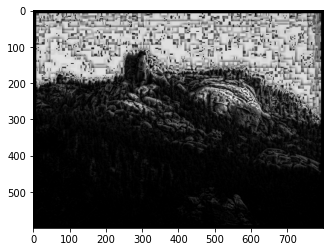

In [191]:
plt.imshow(Ieq)

In [172]:
img=he1
img_size=img.shape
print (img_size)

img_mod = np.zeros((599, 799))

for i in range(0,img_size[0]-30):
    for j in range(0,img_size[1]-30):
        kernel = img[i:i+30,j:j+30]
        for k in range(0,30):
            for l in range(0,30):
                element = kernel[k,l]
                rank = 0
                for m in range(0,30):
                    for n in range(0,30):
                        if(kernel[k,l]>kernel[m,n]):
                            rank = rank + 1
                img_mod[i,j] = ((rank * 255 )/900)



(599, 799)


KeyboardInterrupt: ignored

In [149]:
he1.shape

(599, 799)

In [170]:
def AHE(im, tile_x=8, tile_y=8):        
    h, w = im.shape
    out = np.zeros(im.shape) # Declare output variable

    for i in range(0, h, tile_x):
        for j in range(0, w, tile_y):
            # Get the block
            blk = im[i: min(i + tile_x, h), j: min(j + tile_y, w)]
            probs = get_distr(blk)
            out[i: min(i + tile_x, h), j: min(j + tile_y, w)] = CHE(blk, probs)
    return out

def CHE(im, probs):
    T = np.array(list(map(int, 255*np.cumsum(probs))))
    return T[im]

def get_distr(im):
   hist, _ = np.histogram(im.flatten(),256,[0,256])
   return hist / hist.sum()

In [171]:
aaa=AHE(he1)

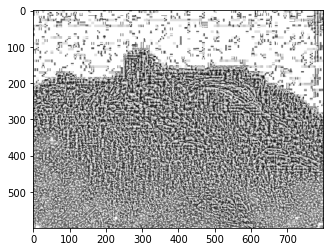

In [169]:
plt.imshow(aaa)

In [181]:

from PIL import Image

In [173]:
def addpadding(source,pad):
    imarr = np.array(source)
    padimarr = np.zeros((imarr.shape[0]+2*pad,imarr.shape[1]+2*pad),dtype=np.uint8)
    padimarr[pad:padimarr.shape[0]-pad,pad:padimarr.shape[1]-pad]=imarr
    return padimarr

In [174]:
def part(local): #local hist. eq. function
    possibility = [0 for i in range (256)] # need for local hist. eq.
    for v in range (3):
        for h in  range (3):
            P= local [v] [h]
            possibility[P] = possibility[P] +1

    for o in range (256):
        possibility[o] = float(float ( float ( possibility[o]) / 9 ) * 255 )
        possibility[o] = int (round( possibility[o]))

    
    S = local [1][1]
    
    return possibility[S]

In [186]:
orj_img = Image.open('/content/sample_data/HE1.jpg').convert('L')
sizex = orj_img.size[0] 
sizey = orj_img.size[1] 
img = addpadding(orj_img,1)

Matrix = [[0 for x in range(sizex+2)] for y in range(sizey+2)] 
for i in range(sizex -1): 
    for y in range(sizey-1):
        temp1 = np.array([img[i, y], img[i+1, y], img[i+2, y]])
        local = np.vstack([temp1])
        temp2 = np.array([img[i, y+1], img[i+1, y+1], img[i+2, y+1]])
        local = np.vstack([local, temp2])
        temp3 = np.array([img[i, y + 2], img[i + 1, y + 2], img[i + 2, y + 2]])
        local = np.vstack([local, temp3])
        Matrix[i+1][y+1]=part(local)


MatrixFinish = [[0 for x in range(sizex)] for y in range(sizey)]  # again convert orjinal  size"example 512 x 512 image"
for k in range (sizex):
    for t in range(sizey):
        MatrixFinish[t][k] =  Matrix[t+1][k+1]


        


IndexError: ignored

In [ ]:
#finish part
np.array(MatrixFinish)


In [79]:
def get_slices(arr, width, height):
    """Collects m (width) x n (height) slices for a padded array"""
    row, col = 0, 0
    slices = []
    for i in range(len(arr) - width + 1): #get row
        for j in range(len(arr[i]) - height + 1): #get column
            r = i + width
            c = j + height
            sub_array = arr[i:r, j:c]
            slices.append(sub_array)
    return np.array(slices)

In [131]:
def pdf(x):
	m, n = x.shape
	h = [0.0] * 256
	for i in range(m):
		for j in range(n):
			h[x[i, j]]+=1
	return np.array(h)/(m*n)

In [135]:
def cumsum(x):
  return [sum(pdf(x[:i+1])) for i in range(len(x))]

In [142]:
for i in range(len(a)):
  print(i)
  print(pdf(a[:i+1]))

0
[0.         0.33333333 0.33333333 0.33333333 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.       

In [121]:
a[2][2]

9

In [117]:
a.shape

(3, 3)

In [134]:
sl[4]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=uint8)

In [136]:
cs = cumsum(sl[4])
cs

[1.0, 0.9999999999999999, 1.0000000000000002]

In [91]:
h = pdf(he1)
cumsum = np.array(cdf(h))
plt.plot(cumsum)

KeyboardInterrupt: ignored

In [115]:
a = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [72]:
a.shape

(3, 3)

In [105]:
a2 = addpadding(a,1)
a2

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 0],
       [0, 4, 5, 6, 0],
       [0, 7, 8, 9, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [106]:
sl = get_slices(a2, 3,3)
sl

array([[[0, 0, 0],
        [0, 1, 2],
        [0, 4, 5]],

       [[0, 0, 0],
        [1, 2, 3],
        [4, 5, 6]],

       [[0, 0, 0],
        [2, 3, 0],
        [5, 6, 0]],

       [[0, 1, 2],
        [0, 4, 5],
        [0, 7, 8]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[2, 3, 0],
        [5, 6, 0],
        [8, 9, 0]],

       [[0, 4, 5],
        [0, 7, 8],
        [0, 0, 0]],

       [[4, 5, 6],
        [7, 8, 9],
        [0, 0, 0]],

       [[5, 6, 0],
        [8, 9, 0],
        [0, 0, 0]]], dtype=uint8)

In [107]:
sl[4]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=uint8)

In [93]:
sl[0]

array([[0, 0, 0],
       [0, 1, 2],
       [0, 4, 5]], dtype=uint8)

In [92]:
h = pdf(sl[0])
h

array([0.55555556, 0.11111111, 0.11111111, 0.        , 0.11111111,
       0.11111111, 0.        , 0.        , 0.        ])

In [94]:
h.shape

(9,)

In [84]:
h = pdf(sl[0])
cumsum = np.array(cdf(h))
cumsum

array([0.55555556, 0.66666667, 0.77777778, 0.77777778, 0.88888889,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [87]:
h.shape

(256,)

In [86]:
h

array([0.55555556, 0.11111111, 0.11111111, 0.        , 0.11111111,
       0.11111111, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [85]:
cumsum.shape

(256,)

#2

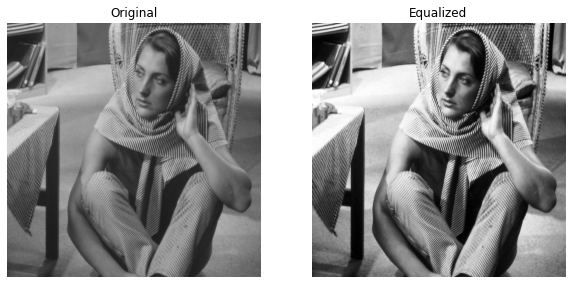

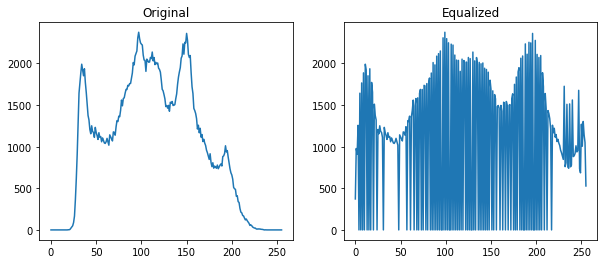

In [ ]:
equ = cv2.equalizeHist(img)
imshow(img, equ, title=['Original', 'Equalized'])

# Plot histograms
plt.figure(figsize=(10, 4))

hist1, _ = np.histogram(img, 256, (0, 255))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.plot(list(range(256)), hist1)

hist2, _ = np.histogram(equ, 256, (0, 255))
plt.subplot(1, 2, 2)
plt.title('Equalized')
plt.plot(list(range(256)), hist2)

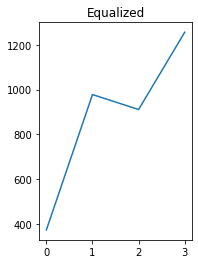

In [ ]:
hist3, _ = np.histogram(equ, 4, (0, 3))
plt.subplot(1, 2, 2)
plt.title('Equalized')
plt.plot(list(range(4)), hist3)

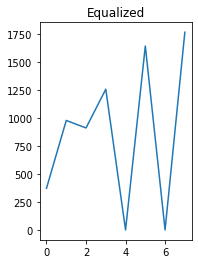

In [ ]:
hist4, _ = np.histogram(equ, 8, (0, 7))
plt.subplot(1, 2, 2)
plt.title('Equalized')
plt.plot(list(range(8)), hist4)

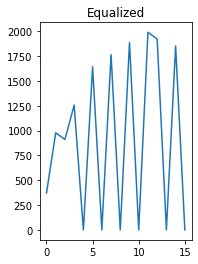

In [ ]:
hist5, _ = np.histogram(equ, 16, (0, 15))
plt.subplot(1, 2, 2)
plt.title('Equalized')
plt.plot(list(range(16)), hist5)

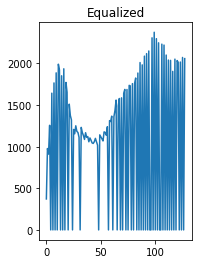

In [ ]:
hist6, _ = np.histogram(equ, 128, (0, 127))
plt.subplot(1, 2, 2)
plt.title('Equalized')
plt.plot(list(range(128)), hist6)